In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'''C:\Users\MiaZo_000\Desktop\LoanData.csv''',skiprows=1)

C:\Users\MiaZo_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


In [6]:
df.select_dtypes(exclude='O').describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.000000,9700.000000,15000.000000,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,5000.000000,9600.000000,15000.000000,3.500000e+04
funded_amnt_inv,42535.0,10139.938785,7131.598014,0.00,4950.000000,8500.000000,14000.000000,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,165.520000,277.690000,428.180000,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,40000.000000,59000.000000,82500.000000,6.000000e+06
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,42535.0,13.373043,6.726315,0.00,8.200000,13.470000,18.680000,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,0.000000,0.000000,0.000000,1.300000e+01
inq_last_6mths,42506.0,1.081424,1.527455,0.00,0.000000,1.000000,2.000000,3.300000e+01


There are total 42542 rows and quite a few features does not have a non-null values at all. I am going to delete those columns that have too many nulls.

In [8]:
df = df.dropna(thresh=len(df)*0.5,axis=1)

In [11]:
df.select_dtypes(include='O').describe().T

,count,unique,top,freq
term,42535,2,36 months,31534
int_rate,42535,394,10.99%,970
grade,42535,7,B,12389
sub_grade,42535,35,B3,2997
emp_title,39909,30658,US Army,139
emp_length,41423,11,10+ years,9369
home_ownership,42535,5,RENT,20181
verification_status,42535,3,Not Verified,18758
issue_d,42535,55,Dec-11,2267
loan_status,42535,4,Fully Paid,34116


Notice there are some features only having one value. Those should be dropped as well.

In [13]:
# Drop columns that have one unique value
df = df.loc[:,df.apply(lambda x:x.nunique() != 1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 44 columns):
loan_amnt                  42535 non-null float64
funded_amnt                42535 non-null float64
funded_amnt_inv            42535 non-null float64
term                       42535 non-null object
int_rate                   42535 non-null object
installment                42535 non-null float64
grade                      42535 non-null object
sub_grade                  42535 non-null object
emp_title                  39909 non-null object
emp_length                 41423 non-null object
home_ownership             42535 non-null object
annual_inc                 42531 non-null float64
verification_status        42535 non-null object
issue_d                    42535 non-null object
loan_status                42535 non-null object
desc                       29242 non-null object
purpose                    42535 non-null object
title                      42522 non-null object
zip_

#### Now, the number of columns is cut down from 145 to 44. I am going to look at the meta data and to understand what those features are. This loan data file contains the complete information of the loans, including the current status of loans and last payment, so I need to drop those variables that only make sense after loans are approved.

### I need to go back to the meta data file with the remaining variables. I copied the list of columns above into excel and used the function, VLOOKUP, to find the explanations.

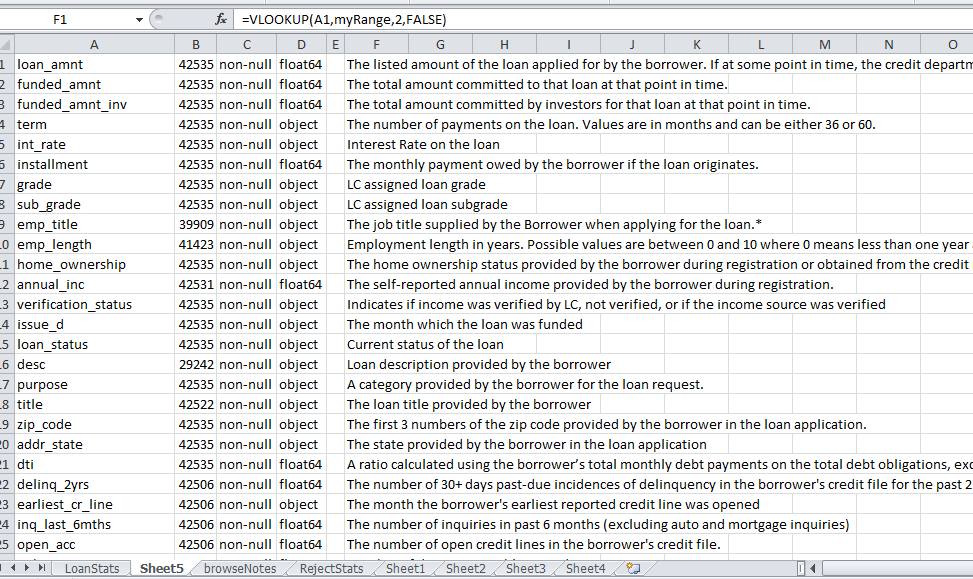
